In [120]:
import requests
api = f'https://datahub-v2.arlingtonva.us/api/RealEstate/SalesHistory?$filter=saleDate gt 2019-01-01T00:00:00.000Z&$top=40000'
response = requests.get(api)
data = response.json()

In [121]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,salesHistoryKey,propertyKey,realEstatePropertyCode,provalLrsnId,neighborhoodNbr,propertyStreetNbrNameText,salesTypeCode,salesTypeDsc,deedBookNbr,deedPageNbr,granteeName,saleAmt,saleDate,landRecordDocumentNbr,maskOwnerAddressInd
0,707176516,2,01001007,134,501001,3007 N ROCHESTER ST,None,None,,,FOWLER ROBERT JASON &,1799000,2019-01-24T00:00:00.000Z,20190100001300,False
1,707176784,13,01001021,148,501001,6549 36th ST N,W,W-Will / R.O.S/L O H,,,ESTATE OF PHYLLIS BOWYER BUSH,0,2020-12-16T00:00:00.000Z,20210400015341,False
2,707176844,15,01001024,151,501001,36th ST N,J,J-Property in 2 Jurisdictions,,,PETERSEN WILLIAM PATRICK JR & HEATHER PETERSON,1699000,2019-07-22T00:00:00.000Z,20190100013145,False
3,707177184,27,01001040,167,501853,3211 N TACOMA ST,None,None,,,DOREY-FERRERA JESSE DEREK OMERIAH,949000,2022-11-28T00:00:00.000Z,20220100019743,False
4,707177268,66325,01001045,172,501853,3221 N TACOMA ST,None,None,,,KHOURY TAWFIQ,1000000,2020-07-10T00:00:00.000Z,20200100016426,False


In [122]:
df_selected = df[['salesHistoryKey','neighborhoodNbr','propertyStreetNbrNameText','salesTypeDsc','saleAmt','saleDate']]
df_selected.head()

,salesHistoryKey,neighborhoodNbr,propertyStreetNbrNameText,salesTypeDsc,saleAmt,saleDate
0,707176516,501001,3007 N ROCHESTER ST,None,1799000,2019-01-24T00:00:00.000Z
1,707176784,501001,6549 36th ST N,W-Will / R.O.S/L O H,0,2020-12-16T00:00:00.000Z
2,707176844,501001,36th ST N,J-Property in 2 Jurisdictions,1699000,2019-07-22T00:00:00.000Z
3,707177184,501853,3211 N TACOMA ST,None,949000,2022-11-28T00:00:00.000Z
4,707177268,501853,3221 N TACOMA ST,None,1000000,2020-07-10T00:00:00.000Z


In [123]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34240 entries, 0 to 34239
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salesHistoryKey            34240 non-null  int64 
 1   neighborhoodNbr            34240 non-null  int64 
 2   propertyStreetNbrNameText  34239 non-null  object
 3   salesTypeDsc               19937 non-null  object
 4   saleAmt                    34240 non-null  int64 
 5   saleDate                   34240 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.6+ MB


In [124]:
df_selected.rename(columns={'neighborhoodNbr':'neighborhood','saleAmt':'sale amount','propertyStreetNbrNameText':'street name'}, inplace=True)

C:\Users\binch\AppData\Local\Temp\ipykernel_17620\2872748091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'neighborhoodNbr':'neighborhood','saleAmt':'sale amount','propertyStreetNbrNameText':'street name'}, inplace=True)


### Change to DateTime type

In [125]:
df_selected['saleDate'] = pd.to_datetime(df_selected['saleDate'])
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34240 entries, 0 to 34239
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   salesHistoryKey  34240 non-null  int64              
 1   neighborhood     34240 non-null  int64              
 2   street name      34239 non-null  object             
 3   salesTypeDsc     19937 non-null  object             
 4   sale amount      34240 non-null  int64              
 5   saleDate         34240 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 1.6+ MB


C:\Users\binch\AppData\Local\Temp\ipykernel_17620\2696276801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['saleDate'] = pd.to_datetime(df_selected['saleDate'])


### Sorted Table
* Sort by [street name], [sale date]
* for each street name:
    1. create column of **previous sale date**
    2. create column of **day between sale date**

In [129]:
sorted_df = df_selected.sort_values(by=['street name', 'saleDate'])
sorted_df['Days between last sale'] = sorted_df.groupby('street name')['saleDate'].diff().dt.days
sorted_df['Previous saleDate'] = sorted_df.groupby('street name')['saleDate'].shift()
pd.set_option('display.float_format', '{:.0f}'.format)
sorted_df.head()

,salesHistoryKey,neighborhood,street name,salesTypeDsc,sale amount,saleDate,Days between last sale,Previous saleDate
17716,707756596,507060,1 N FENWICK ST,None,2135000,2022-09-29 00:00:00+00:00,NaN,NaT
7454,707476540,504043,1 N MADISON ST,W-Will / R.O.S/L O H,0,2021-01-21 00:00:00+00:00,NaN,NaT
6623,707476544,504043,1 N MADISON ST,2-Sale or Gift to Relative,0,2023-10-06 00:00:00+00:00,988,2021-01-21 00:00:00+00:00
10527,707518076,504062,10 N GREENBRIER ST,5-Not Market Sale,0,2019-04-04 00:00:00+00:00,NaN,NaT
11209,707518080,504062,10 N GREENBRIER ST,None,1235000,2024-06-18 00:00:00+00:00,1902,2019-04-04 00:00:00+00:00


### More Metrics
* for each street name:
    1. cumulative sum of sale amount from each sale 
    2. marginal increase/decrease of sale amount from each sale 
    3. percentage change of sale amount from each sale 

In [130]:
import numpy as np
sorted_df['cumsum sale amount'] = sorted_df.groupby('street name')['sale amount'].cumsum()
sorted_df['margin sale amount'] = sorted_df.groupby('street name')['sale amount'].diff()
stat_df = sorted_df.sort_values(['street name','saleDate']).reset_index(drop=True)
stat_df['amount_pct_change'] = stat_df.groupby('street name')['sale amount'].pct_change() * 100
stat_df['amount_pct_change'].replace(np.inf, np.nan, inplace=True)
stat_df['amount_pct_change'] = stat_df['amount_pct_change'].apply(lambda x:f"{x:.2f}%" if pd.notnull(x) else np.nan)
stat_df.head()

,salesHistoryKey,neighborhood,street name,salesTypeDsc,sale amount,saleDate,Days between last sale,Previous saleDate,cumsum sale amount,margin sale amount,amount_pct_change
0,707756596,507060,1 N FENWICK ST,None,2135000,2022-09-29 00:00:00+00:00,NaN,NaT,2135000,NaN,NaN
1,707476540,504043,1 N MADISON ST,W-Will / R.O.S/L O H,0,2021-01-21 00:00:00+00:00,NaN,NaT,0,NaN,NaN
2,707476544,504043,1 N MADISON ST,2-Sale or Gift to Relative,0,2023-10-06 00:00:00+00:00,988,2021-01-21 00:00:00+00:00,0,0,NaN
3,707518076,504062,10 N GREENBRIER ST,5-Not Market Sale,0,2019-04-04 00:00:00+00:00,NaN,NaT,0,NaN,NaN
4,707518080,504062,10 N GREENBRIER ST,None,1235000,2024-06-18 00:00:00+00:00,1902,2019-04-04 00:00:00+00:00,1235000,1235000,NaN


### Aggregations Table
* for each street name:
    1. sum of sale amount
    2. average of sale amount
    3. number of sales
    4. total sale amount

In [131]:
aggregate_df = sorted_df.groupby('street name').agg(
    max_sale_amount=('sale amount', 'sum'), 
    avg_sale_amount=('sale amount', 'mean'),
    num_of_sales = ('street name','size'),
    total_sale_amount = ('sale amount', 'sum')
        ).reset_index()
aggregate_df.sort_values(by='num_of_sales', ascending=False)

,street name,max_sale_amount,avg_sale_amount,num_of_sales,total_sale_amount
5685,1771 N PIERCE ST,828404100,1476656,561,828404100
23818,WILSON BLVD,108721248,4941875,22,108721248
21770,7th ST S,32917000,1496227,22,32917000
23764,N VERMONT ST,45895320,2294766,20,45895320
23724,N IRVING ST,216321248,12724779,17,216321248
...,...,...,...,...,...
9328,2402 N POTOMAC ST,969000,969000,1,969000
9327,2401 S QUEEN ST,980000,980000,1,980000
9325,2401 S JOYCE ST,1251000,1251000,1,1251000
9324,2401 S GRANT ST,1300000,1300000,1,1300000


# Data Visualization
## Sales per Year

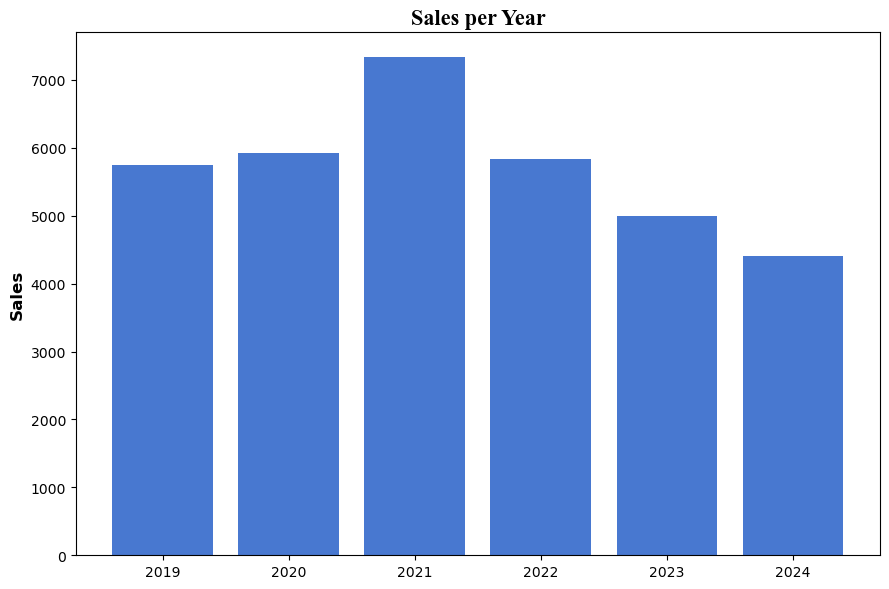

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

year= df_selected['saleDate'].dt.year
sales_per_year = df.groupby(year).aggregate('size').reset_index()
sales_per_year.rename(columns={0:'Sales'}, inplace=True)

fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(data=sales_per_year,x='saleDate' ,height='Sales',color = sns.color_palette(palette='muted', n_colors=1) )


plt.title('Sales per Year',fontsize = 16, fontweight = 'bold', fontname='Times New Roman' )
plt.ylabel('Sales',fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Sales Each Year by Month

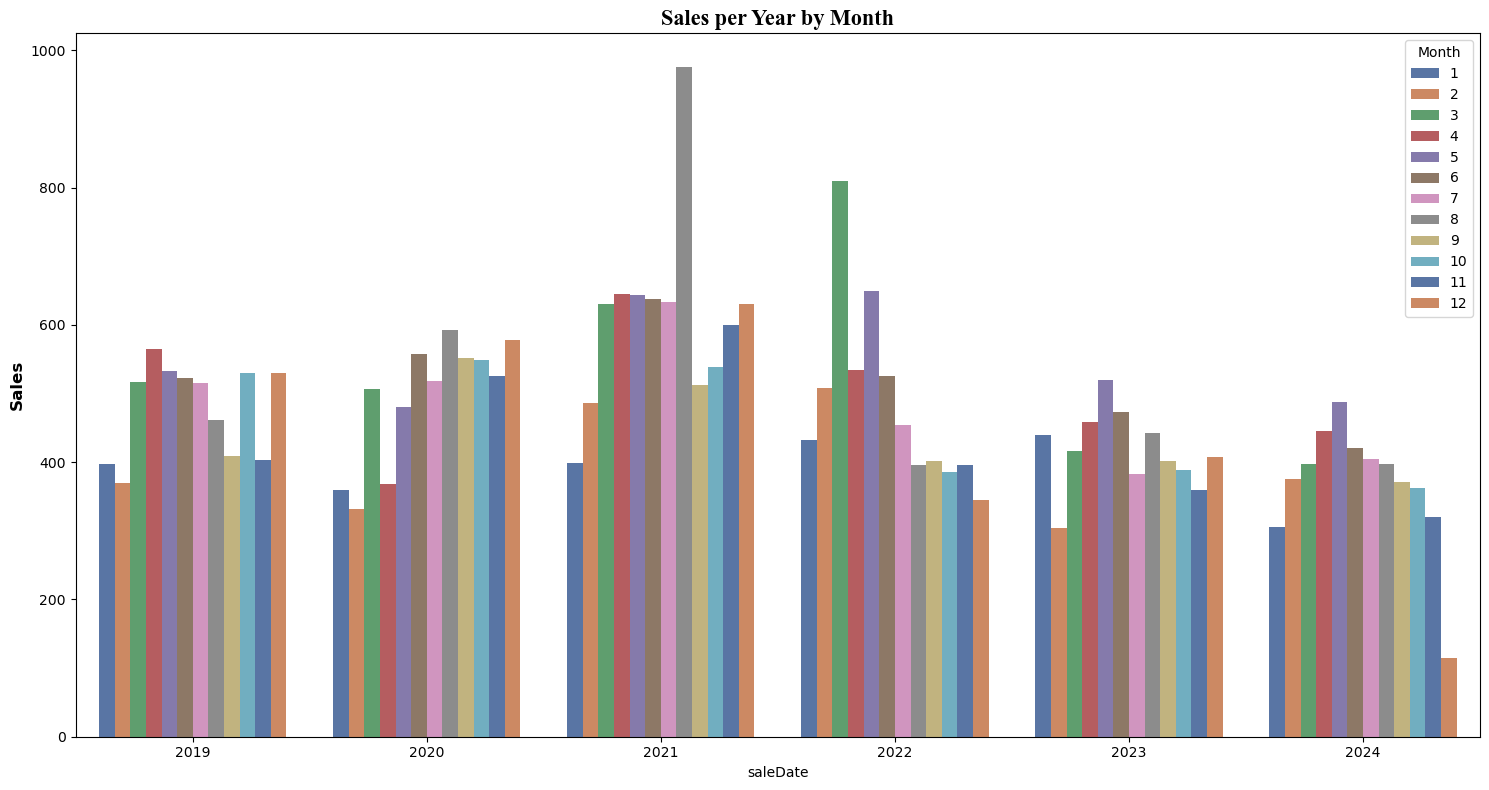

In [133]:
month = df_selected['saleDate'].dt.month
sale_per_month = df_selected.pivot_table(index=year,columns=month,aggfunc='size').reset_index()
df_long = sale_per_month.melt(id_vars='saleDate',var_name="Month", value_name="Sales")


plt.figure(figsize=(15, 8))
sns.barplot(data=df_long,x='saleDate', y='Sales', hue='Month',dodge=True,width=0.8, palette='deep')
plt.title('Sales per Year by Month',fontsize = 16, fontweight = 'bold', fontname='Times New Roman' )
plt.ylabel('Sales',fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Sales Each Year by Quarter

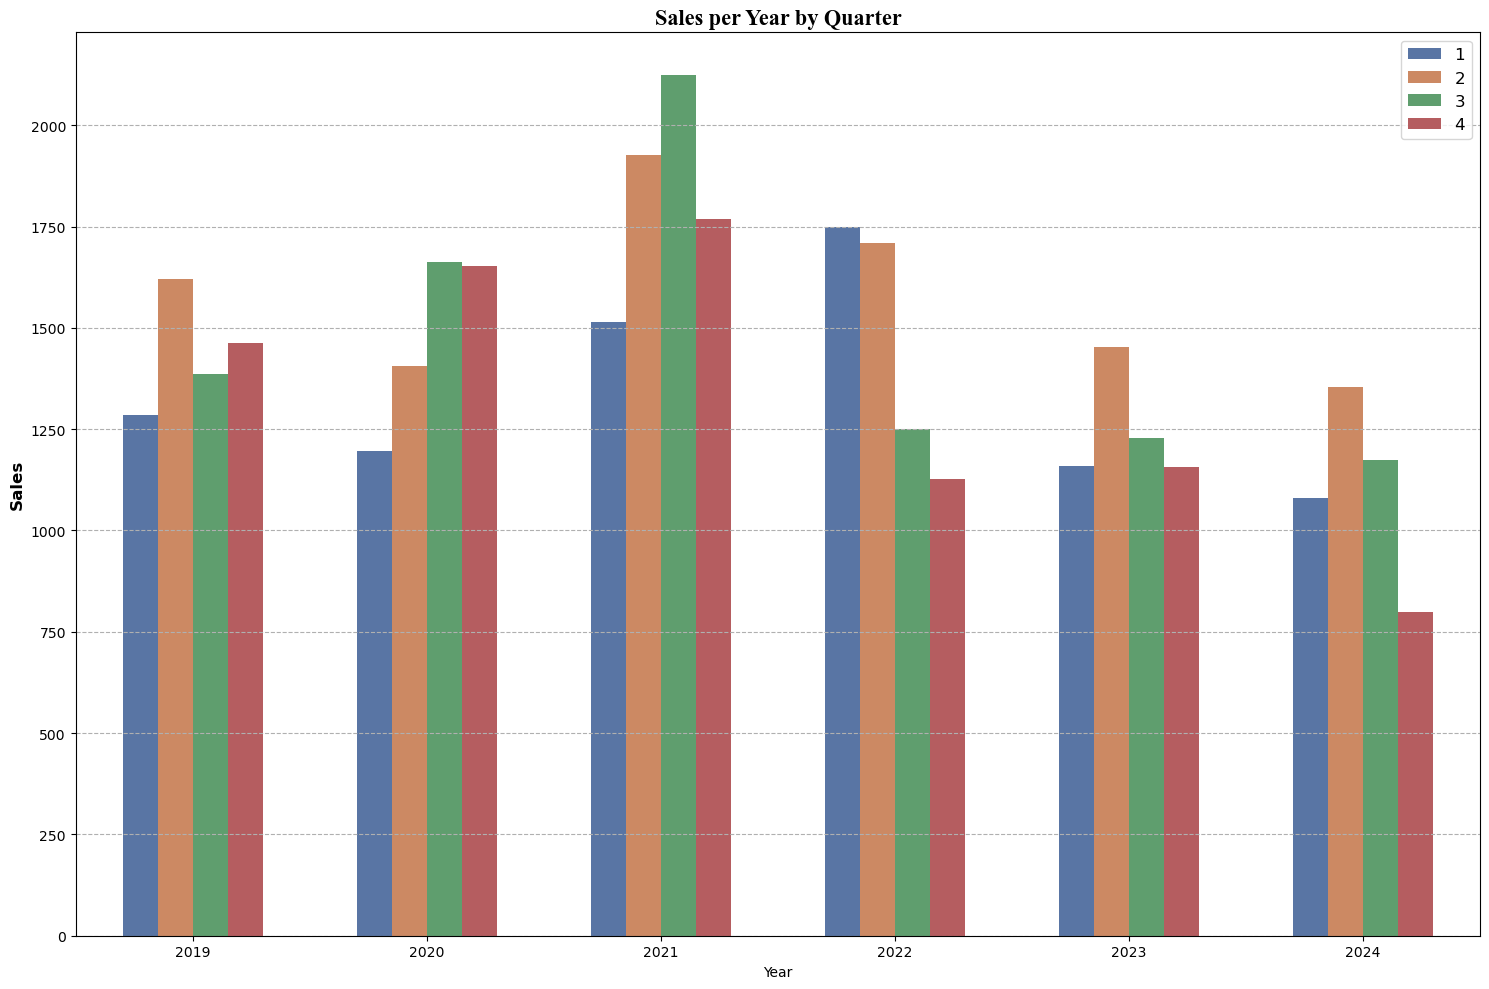

In [134]:
quarter = df_selected['saleDate'].dt.quarter
sales_per_quarter = df_selected.pivot_table(index=[year,quarter],aggfunc='size').reset_index(allow_duplicates=True)
sales_per_quarter.columns = ['Year', 'Quarter', 'Sales']


plt.figure(figsize=(15,10))
sns.barplot(data=sales_per_quarter,x='Year', y='Sales',hue='Quarter', width=0.6,palette='deep', dodge=True)
plt.title('Sales per Year by Quarter',fontsize = 16, fontweight = 'bold', fontname='Times New Roman' )
plt.ylabel('Sales',fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.legend(fontsize = 12)
plt.grid(True,linestyle = '--', axis='y')
plt.show()